In [63]:
rm(list = ls())
gc()

setwd("/mnt/data00/minghui/project_NMF/06_Test_NMF_Program_0213/")
library(Seurat)
library(dplyr)
library(cowplot)
library(harmony)
library(readr) 
library(tidyr)
library(gplots)
library(reshape2)
library(paletteer)
library(AUCell)
library(pheatmap)
suppressPackageStartupMessages(library(NMF))
suppressMessages(library(ggplot2))
suppressMessages(library(tidyverse))
suppressMessages(library(scibet))
suppressMessages(library(viridis))
suppressMessages(library(ggsci))
 
d_palettes<- palettes_d_names
mycol<-paletteer_d( "ggsci::default_igv",n=51)

# source('../Fuctions/Markers_kno.R')
# source('../Fuctions/seurat_functions.R')

library(ComplexHeatmap)
library(circlize)

library(scater)


library(htmlwidgets)

library(GSVA)

library(corrplot)


library(patchwork)


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,12323268,658.2,19552614,1044.3,19552614,1044.3
Vcells,765653138,5841.5,1783770341,13609.1,1572470235,11997.0


In [64]:
AllTissue_merge <-readRDS('../02_NMFAllTissue/03_AllTissue_merge.rds')

# A heatmap or the correlation confusion plot 

In [65]:
Healthy_moduleScore <- readRDS('./02_Healthy_moduleScore.rds')

In [66]:
BE_moduleScore <-readRDS("/mnt/data00/minghui/project_NMF/04_Test_NMF_Program_0120/05_moduleScore.rds") %>% t()%>% as.data.frame

BE_moduleScore <- BE_moduleScore[,grepl(pattern = 'BE',x = colnames(BE_moduleScore))]

colnames(BE_moduleScore) <- gsub('modules','module',colnames(BE_moduleScore) )

head(BE_moduleScore )

,BE_module1,BE_module3,BE_module4,BE_module5,BE_module6,BE_module7,BE_module8,BE_module10,BE_module11,BE_module12,BE_module14,BE_module15,BE_module16,BE_module17,BE_module18,BE_module19,BE_module21
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRR8513799-CTCACACGTCACCCAG-1,0.1550850,0.2526822,0.06129739,0.2188196,0.2493345,0.4448295,0.1777360,0.6041700,0.16490311,0.16345655,0.16250000,0.7843992,0.18755441,0.1980326,0.9714024,0.3293303,0.3863923
SRR8513799-TACAGTGGTCATCCCT-1,0.1316673,0.2318313,0.19529913,0.2978776,0.2890661,0.5235595,0.1272618,0.3631629,0.12318697,0.11749382,0.09530201,0.8194613,0.19878126,0.2211749,0.9418884,0.3262650,0.2179756
SRR8513799-GCACATACACTGTCGG-1,0.1674745,0.1851385,0.16516075,0.2135012,0.3029051,0.5326612,0.1636309,0.3497916,0.11810447,0.14177169,0.09052013,0.8098503,0.17566716,0.2338687,0.9772823,0.2670166,0.3791379
SRR8513799-CTGAAACTCTGGCGAC-1,0.1839847,0.1943278,0.14726983,0.3199673,0.2393197,0.4522159,0.1175674,0.2070269,0.29442714,0.11704758,0.10461409,0.8323738,0.20832708,0.1673095,0.9882021,0.1861432,0.1988469
SRR8513799-AGTAGTCAGTGAAGAG-1,0.1839111,0.2218957,0.15750608,0.1803542,0.2302345,0.3631240,0.1599127,0.3584437,0.07611450,0.06846771,0.00000000,0.7419980,0.10911656,0.5118768,0.9741896,0.2280495,0.3802069
SRR8513799-ATCCGAACAACGATGG-1,0.1229569,0.2474111,0.34851259,0.1746896,0.4248046,0.6117062,0.3250188,0.3044256,0.07648053,0.04707230,0.19236577,0.4978345,0.07057305,0.5531151,0.9891566,0.0408566,0.4649307


In [67]:
identical(rownames(t(Healthy_moduleScore)),rownames(BE_moduleScore))

[1] TRUE

In [68]:
cor_matrix <- cor(x = t(Healthy_moduleScore) ,y = BE_moduleScore ,method = "spearman")

In [69]:
my_color = rev(paletteer_d("RColorBrewer::RdYlBu"))
my_color = colorRampPalette(my_color)(10) 

Warning message in as.dist.default(1 - corr):
“non-square matrix”


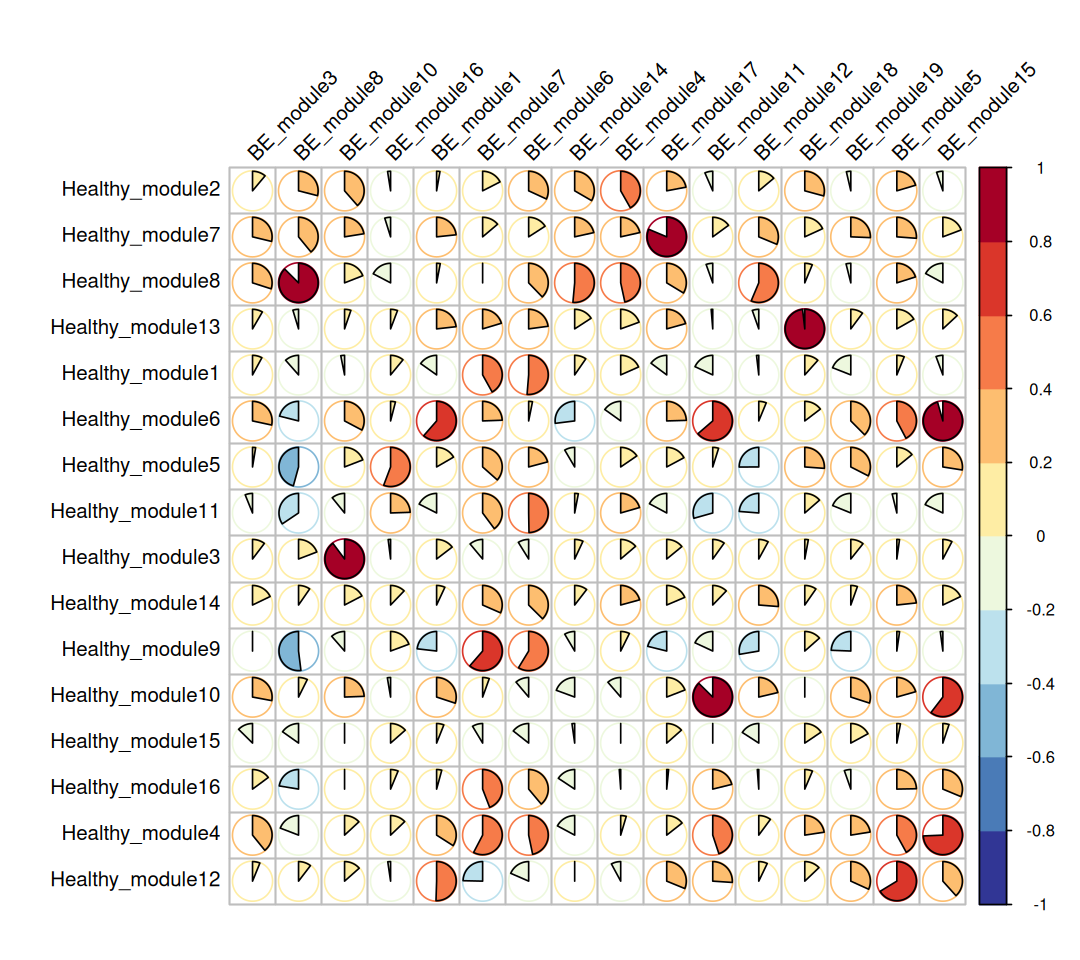

In [70]:
# pdf("./05_FiguresforPresentation/01_correlation_plot_BE_Healthy_1.pdf", width = 9, height = 8)
# png("./05_FiguresforPresentation/01_correlation_plot_BE_Healthy_1.png", width = 9, height = 8, units = "in", res = 300)

options(repr.plot.width =9, repr.plot.height=8)

corrplot(cor_matrix, type = "full", 
         method = "pie",
         order = "hclust", 
         col = my_color,
         tl.col = "black", 
         tl.srt = 45)

# dev.off()

Warning message in as.dist.default(1 - corr):
“non-square matrix”


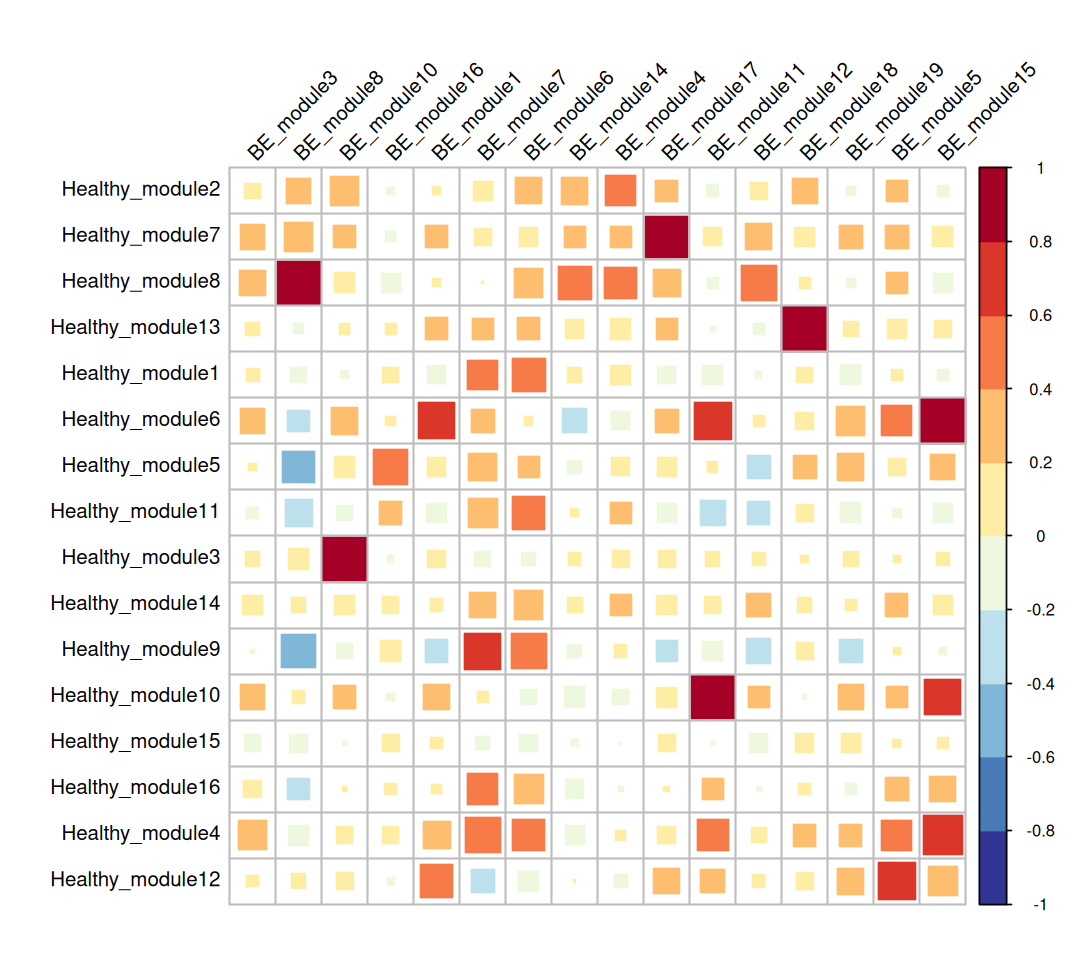

In [71]:
# pdf("./05_FiguresforPresentation/01_correlation_plot_BE_Healthy_2.pdf", width = 9, height = 8)
# png("./05_FiguresforPresentation/01_correlation_plot_BE_Healthy_2.png", width = 9, height = 8, units = "in", res = 300)
options(repr.plot.width =9, repr.plot.height=8)

corrplot(cor_matrix, type = "full", 
         method = "square",
         order = "hclust", 
         col = my_color,
         tl.col = "black", 
         tl.srt = 45)
#   method = c("circle", "square", "ellipse", "number", "shade", "color", "pie"),
# dev.off()

Warning message in as.dist.default(1 - corr):
“non-square matrix”


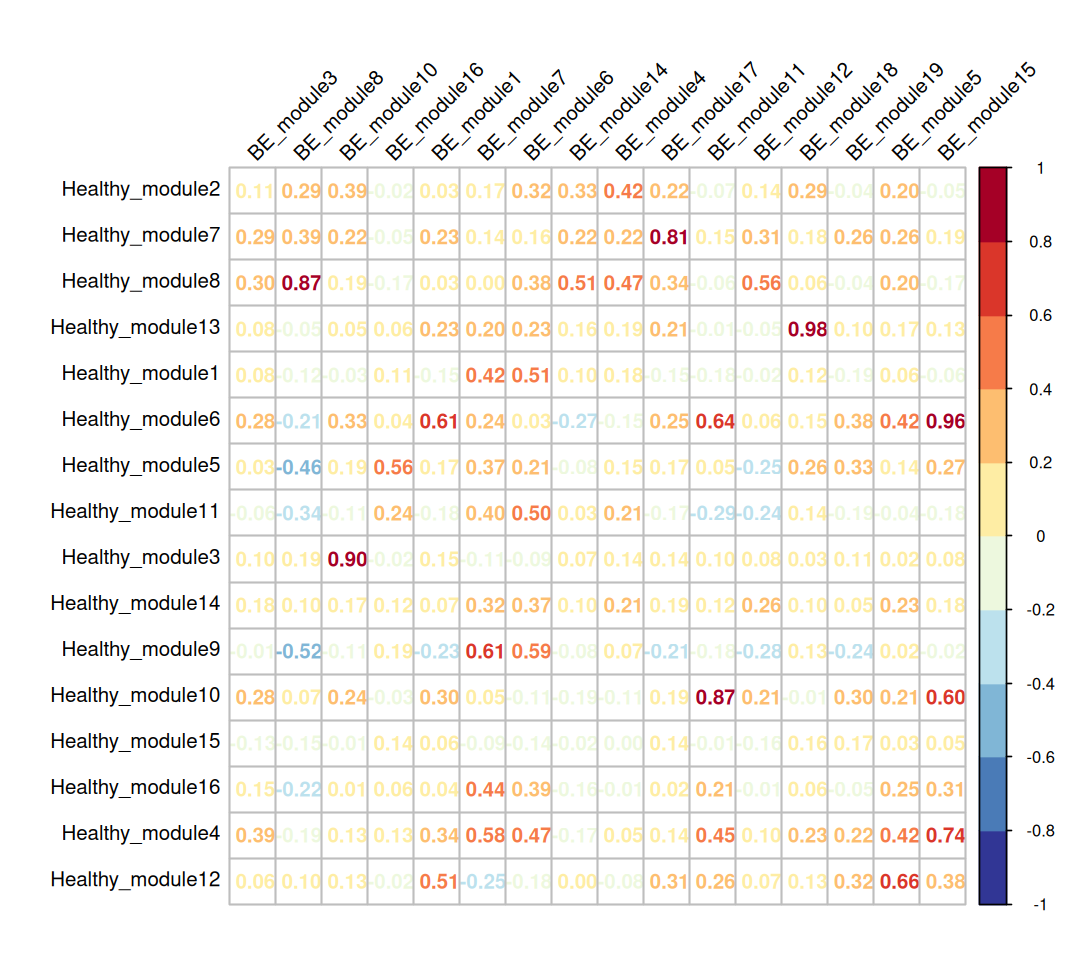

In [72]:
# pdf("./05_FiguresforPresentation/01_correlation_plot_BE_Healthy_3.pdf", width = 10, height = 9)
# png("./05_FiguresforPresentation/01_correlation_plot_BE_Healthy_3.png", width = 10, height = 9, units = "in", res = 300)
options(repr.plot.width =9, repr.plot.height=8)

corrplot(cor_matrix, type = "full", 
         method = "number",
         order = "hclust", 
         col = my_color,
         tl.col = "black", 
         tl.srt = 45)
# dev.off()

In [73]:
# threshold <- 0.3

# cor_matrix[abs(cor_matrix) <= threshold | p_matrix >= 0.05] <- 0

my_color = rev(paletteer_d("RColorBrewer::RdYlBu"))
my_color = colorRampPalette(my_color)(10) 
# pdf("./05_FiguresforPresentation/01_correlation_plot_BE_Healthy_4.pdf", width = 7, height =6)
# png("./05_FiguresforPresentation/01_correlation_plot_BE_Healthy_4.png", width = 7, height =6, units = "in", res = 300)
options(repr.plot.width =9, repr.plot.height=8)
pheatmap(cor_matrix,color =my_color ,fontsize_row = 12,fontsize_col = 12,name = 'Correlation')

# dev.off()

In [74]:
cor_matrix

,BE_module1,BE_module3,BE_module4,BE_module5,BE_module6,BE_module7,BE_module8,BE_module10,BE_module11,BE_module12,BE_module14,BE_module15,BE_module16,BE_module17,BE_module18,BE_module19,BE_module21
Healthy_module1,-0.15182101,0.079578832,0.18356529,0.06143989,0.51300404,0.419280370,-0.11517533,-0.031114386,-0.180880355,-0.01840379,0.096343893,-0.05670371,0.10933736,-0.14832873,0.116193809,-0.19034473,0.254617901
Healthy_module2,0.02751287,0.110954465,0.41795091,0.20377497,0.31880364,0.174665115,0.28988083,0.385545572,-0.065617580,0.13896297,0.333570364,-0.05183146,-0.02463426,0.22021467,0.292169174,-0.03645278,0.495048711
Healthy_module3,0.14603759,0.103432404,0.13754361,0.02200609,-0.08838820,-0.110918641,0.19169698,0.898157252,0.099106488,0.07954023,0.069577413,0.07684914,-0.01978863,0.14071891,0.029068892,0.10724535,0.208578155
Healthy_module4,0.34029992,0.391759423,0.04594905,0.42011882,0.46744673,0.576544146,-0.19187623,0.131098628,0.449093850,0.10135905,-0.171743422,0.74343047,0.12832842,0.14389387,0.226126575,0.22478770,0.069785208
Healthy_module5,0.16623202,0.025565044,0.15442089,0.14118120,0.20854724,0.365473897,-0.45732219,0.191139093,0.048475969,-0.25081690,-0.084834982,0.27473714,0.55750784,0.17148887,0.261577486,0.32530890,0.134864496
Healthy_module6,0.61437342,0.283864063,-0.15115402,0.42283474,0.03143546,0.244323812,-0.21074984,0.327378278,0.636732184,0.06244679,-0.269687729,0.95607334,0.03998361,0.24545515,0.146506387,0.37537295,-0.153745312
Healthy_module7,0.23339517,0.287702118,0.21500509,0.26179952,0.15867145,0.138308693,0.39076538,0.224877276,0.149649383,0.31265849,0.215286002,0.19245633,-0.04833552,0.81336412,0.181342337,0.25647384,0.206095312
Healthy_module8,0.03001142,0.299454391,0.46604888,0.20095925,0.37783022,0.001806549,0.87468730,0.190323088,-0.055061609,0.56342263,0.514559877,-0.17087525,-0.17334176,0.33677564,0.062487327,-0.03919032,0.414863823
Healthy_module9,-0.23188200,-0.007737995,0.07316505,0.02254923,0.58705719,0.613681309,-0.51948282,-0.114319516,-0.180933653,-0.27708604,-0.084861727,-0.02098344,0.19308587,-0.21146583,0.134789307,-0.24392489,0.142328769
Healthy_module10,0.30079087,0.279231051,-0.11345981,0.20588782,-0.11169917,0.054993387,0.07367585,0.244116309,0.873782243,0.21309639,-0.194012265,0.60416259,-0.02663153,0.19087203,-0.008527405,0.29967400,-0.147826631


# -	4 radar plots for intestinal, gastric, BE and GIM tissue types using only healthy modules

In [75]:
identical(rownames(t(Healthy_moduleScore)), rownames(BE_moduleScore))

[1] TRUE

In [94]:
# mat <- rbind(rbind(AllTissue_merge@meta.data$Tissue_in_paper , moduleScore),AllTissue_merge@meta.data$Detailed_Cell_Type)

Healthy_df <- cbind(data.frame(       'Tissue_in_paper' = AllTissue_merge@meta.data$Tissue_in_paper ,
                            'Detailed_Cell_Type' = AllTissue_merge@meta.data$Detailed_Cell_Type ),t(Healthy_moduleScore))

In [95]:
scatter_df <- cbind(BE_moduleScore,Healthy_df )

scatter_df <- scatter_df[ sample(x = rownames(scatter_df),size = nrow(scatter_df)*0.3) , c('Tissue_in_paper', 'Detailed_Cell_Type',colnames(Healthy_df)[3:18 ] ,colnames(BE_moduleScore))]

head(scatter_df)

,Tissue_in_paper,Detailed_Cell_Type,Healthy_module1,Healthy_module2,Healthy_module3,Healthy_module4,Healthy_module5,Healthy_module6,Healthy_module7,Healthy_module8,⋯,BE_module10,BE_module11,BE_module12,BE_module14,BE_module15,BE_module16,BE_module17,BE_module18,BE_module19,BE_module21
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM3954946-TGTTCCGTCACCCTCA-1,NAG,Foveolar_Intermediate,0.02171781,0.2073559,0.1887591,0.2822933,0.08974383,0.6407204,0.1995096,0.5431111,⋯,0.4121572,0.10224228,0.18202979,0.371308725,0.6543025,0.11572059,0.2674707,0.8892368,0.11324795,0.4470238
Patient16_SIGAB1_CIM-TGATCAGTCATAGGCT-1,CIM,Enterocytes_Intermediate,0.00000000,0.2914237,0.1005949,0.4385718,0.11682057,0.6490738,0.2679744,0.5041147,⋯,0.2300081,0.10191537,0.13090514,0.422818792,0.7657408,0.09948068,0.3097093,0.9921729,0.07591854,0.5746631
Patient16_SIGAA1_GIM-TACCGAACAGATCCTA-1,GIM,Foveolar_Intermediate,0.09331652,0.2787119,0.1423070,0.3130134,0.11445989,0.6710293,0.1782516,0.6175054,⋯,0.2592118,0.15254195,0.12044865,0.466107383,0.7667646,0.09924054,0.2689824,0.9944637,0.19983204,0.4669925
Patient02_SIGAD9_NSCJ-AGGGAGTAGGCTACGA-1,NSCJ,Foveolar_Intermediate,0.00000000,0.2012881,0.2403896,0.2886583,0.10162309,0.7109069,0.2051173,0.4554982,⋯,0.4014247,0.13851269,0.25028041,0.275251678,0.7543468,0.03707261,0.2326460,0.9629262,0.27877388,0.2687564
GSM3954951-AACTCAGTCTGAGTGT-1,CAG,Foveolar_Intermediate,0.00000000,0.3230508,0.2315258,0.2363933,0.12277442,0.6274656,0.1708529,0.5507670,⋯,0.4055921,0.07268892,0.13137551,0.194630872,0.6415511,0.15636538,0.2288890,0.6532778,0.32412345,0.3966630
SRR8513798-TGTGTTTTCCACGCAG-1,Rectum,Intestinal_Undifferentiated,0.03642987,0.2747119,0.1799782,0.4458856,0.19032405,0.7773007,0.3537740,0.2236989,⋯,0.3407336,0.13153858,0.05245131,0.001342282,0.8921507,0.21373038,0.3933307,0.9830094,0.24220029,0.3412241


In [96]:
scatter_df <- scatter_df[,!grepl('BE',colnames(scatter_df))]

In [97]:
scatter_df$Tissuetype <- NA
scatter_df$Tissuetype[scatter_df$Tissue_in_paper %in% c('NGB', 'NGC', 'NSCJ')] <- 'Stomach'
scatter_df$Tissuetype[scatter_df$Tissue_in_paper %in% c('Colon', 'Ileum', 'ND', 'Rectum')] <- 'Intestine'
scatter_df$Tissuetype[scatter_df$Tissue_in_paper %in% c('E-GM', 'BE-IM', 'BSCJ')] <- 'BE'
scatter_df$Tissuetype[scatter_df$Tissue_in_paper %in% c('GIM','CIM')] <- c('GIM')
scatter_df <-scatter_df[!is.na(scatter_df$Tissuetype),]

In [98]:
scatter_df <- scatter_df %>% select(ncol(scatter_df), everything())

In [99]:
scatter_df$Tissuetype %>% table()

# scatter_df$Detailed_Cell_Type %>% table()

.
       BE       GIM Intestine   Stomach 
     1901      6217      5274      3927 

In [100]:
head(scatter_df)

,Tissuetype,Tissue_in_paper,Detailed_Cell_Type,Healthy_module1,Healthy_module2,Healthy_module3,Healthy_module4,Healthy_module5,Healthy_module6,Healthy_module7,Healthy_module8,Healthy_module9,Healthy_module10,Healthy_module11,Healthy_module12,Healthy_module13,Healthy_module14,Healthy_module15,Healthy_module16
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Patient16_SIGAB1_CIM-TGATCAGTCATAGGCT-1,GIM,CIM,Enterocytes_Intermediate,0.00000000,0.2914237,0.10059487,0.43857184,0.11682057,0.6490738,0.2679744,0.5041147,0.10662177,0.11098580,0.01064563,0.07840586,0.9843762,0.17238740,0.00000000,0.18134454
Patient16_SIGAA1_GIM-TACCGAACAGATCCTA-1,GIM,GIM,Foveolar_Intermediate,0.09331652,0.2787119,0.14230696,0.31301340,0.11445989,0.6710293,0.1782516,0.6175054,0.06546951,0.11039265,0.08539481,0.20763240,0.9886651,0.16046249,0.08221100,0.16436975
Patient02_SIGAD9_NSCJ-AGGGAGTAGGCTACGA-1,Stomach,NSCJ,Foveolar_Intermediate,0.00000000,0.2012881,0.24038963,0.28865831,0.10162309,0.7109069,0.2051173,0.4554982,0.04218107,0.15339181,0.00000000,0.24822946,0.9125373,0.08859077,0.06649832,0.17042017
SRR8513798-TGTGTTTTCCACGCAG-1,Intestine,Rectum,Intestinal_Undifferentiated,0.03642987,0.2747119,0.17997820,0.44588557,0.19032405,0.7773007,0.3537740,0.2236989,0.06546951,0.10010025,0.00000000,0.15816867,0.9659953,0.18165337,0.15637860,0.17882353
SRR8513795-CTGAAGTCACCAGATT-1,Intestine,Ileum,Goblet,0.00000000,0.2622373,0.23132436,0.17546957,0.13469159,0.3886871,0.3958422,0.2544373,0.41367377,0.04993317,0.35850502,0.06922319,0.8968369,0.18540005,0.18836513,0.21260504
GSM3954952-TGGCCAGGTAGCGCTC-1,GIM,GIM,Foveolar_Differentiated,0.00000000,0.5938644,0.09658956,0.07838545,0.06069512,0.3084309,0.1360128,0.4817921,0.00000000,0.01758563,0.04756070,0.04096883,0.9905798,0.04725647,0.00000000,0.03831933


In [101]:
table(scatter_df$Tissue_in_paper,scatter_df$Tissuetype)

        
           BE  GIM Intestine Stomach
  BE-IM   644    0         0       0
  BSCJ    358    0         0       0
  CIM       0 1229         0       0
  Colon     0    0      1226       0
  E-GM    899    0         0       0
  GIM       0 4988         0       0
  Ileum     0    0      2098       0
  ND        0    0       962       0
  NGB       0    0         0     768
  NGC       0    0         0    2358
  NSCJ      0    0         0     801
  Rectum    0    0       988       0

In [102]:
radar_plot_list  <-split(scatter_df ,scatter_df$Tissuetype)

In [103]:
  radar_plot_df <- radar_plot_list[[1]][, -c(1,2)] %>% 
    dplyr::group_by(Detailed_Cell_Type) %>% 
    dplyr::summarise_all(mean) %>%
    as.data.frame() 

# radar_plot_df <- t(radar_plot_df) %>% as.data.frame

rownames(radar_plot_df) <- radar_plot_df$Detailed_Cell_Type

radar_plot_df <- dplyr::select(radar_plot_df, -Detailed_Cell_Type) 

radar_plot_df <- t(radar_plot_df) %>% as.data.frame()

radar_plot_df[radar_plot_df < 0] <- 0 

radar_plot_df$module <- rownames(radar_plot_df)

 radar_plot_df <- radar_plot_df[,c('module', colnames(radar_plot_df)[1:ncol(radar_plot_df)-1])]

In [104]:
mycolor <- c('#D916F2','#27A4F2','#F2CB05','#F29F05','#F25C05',
             
             '#D94169','#171559','#F2D0A7','#F29F80','#F26363',
             
             '#B3A815', '#1FC7FF','#FFF005','#FF1F59','#FFD3B6',
             
             '#DCEDC1', '#F24B88','#A8E6CF','#660373','#F28A80'
)


# be_colors <- scales::seq_gradient_pal('#fef5f0', "#990F0F")(seq(0, 1, length.out = sum(grepl("^BE_module", rownames(radar_plot_df)))))

# healthy_colors <- scales::seq_gradient_pal("#cac5e4", "#260F99")(seq(0, 1, length.out = sum(grepl("^Healthy", rownames(radar_plot_df)))))
 
# colors <- c(healthy_colors , be_colors)
colors <- data.frame('modules' =radar_plot_df$module ,'colors' =rep(mycolor,2)[1:16])


In [105]:
radar_plot_df$module

[1] "Healthy_module1"  "Healthy_module2"  "Healthy_module3"  "Healthy_module4" 
 [5] "Healthy_module5"  "Healthy_module6"  "Healthy_module7"  "Healthy_module8" 
 [9] "Healthy_module9"  "Healthy_module10" "Healthy_module11" "Healthy_module12"
[13] "Healthy_module13" "Healthy_module14" "Healthy_module15" "Healthy_module16"

In [106]:
  plot_list <- list()


  for(i in 1:nrow(radar_plot_df)){
    cur_mod <- as.character(radar_plot_df[i,'module'])
    cur_color <- subset(colors, modules == cur_mod) %>% .$colors
    plot_list[[cur_mod]] <- ggradar::ggradar(
      radar_plot_df[i,], 
        group.colours=cur_color,
          grid.line.width = 0.25,
      draw.points=FALSE,
        grid.label.size = 3,
      fill=TRUE
      ) + 
      Seurat::NoLegend() + 
      ggtitle(cur_mod) + 
      theme(
        plot.title = element_text(face='plain', hjust=0.3)
      )
  }

In [ ]:
# options(repr.plot.height = 35, repr.plot.width =47)  
#     png(paste0('./radar_plot_AUC/',names(radar_plot_list)[6],'.png'),width = 45,height = 45,units = 'in',res = 400)

patch <- wrap_plots(plot_list, 3)
patch+ 
  plot_annotation(
    title = names(radar_plot_list)[1],
    theme = theme(
      plot.title = element_text(size = 40, face = "bold", hjust = 1)
    )
  )

# dev.off()

In [108]:
plot_list_list <- list()

for(i in 1:length(radar_plot_list)){
    
    radar_plot_df <- radar_plot_list[[i]][, -c(1,2)] %>% 
    dplyr::group_by(Detailed_Cell_Type) %>% 
    dplyr::summarise_all(mean) %>%
    as.data.frame() 

# radar_plot_df <- t(radar_plot_df) %>% as.data.frame

rownames(radar_plot_df) <- radar_plot_df$Detailed_Cell_Type

radar_plot_df <- dplyr::select(radar_plot_df, -Detailed_Cell_Type) 

radar_plot_df <- t(radar_plot_df) %>% as.data.frame()

radar_plot_df[radar_plot_df < 0] <- 0 

radar_plot_df$module <- rownames(radar_plot_df)

  radar_plot_df <- radar_plot_df[,c('module', colnames(radar_plot_df)[1:ncol(radar_plot_df)-1])]
    
 plot_list <- list()


  for(j in 1:nrow(radar_plot_df)){
    cur_mod <- as.character(radar_plot_df[j,'module'])
    cur_color <- subset(colors, modules == cur_mod) %>% .$colors
    plot_list[[cur_mod]] <- ggradar::ggradar(
      radar_plot_df[j,], 
        group.colours=cur_color,
          grid.line.width = 0.25,
        grid.label.size = 3,
      draw.points=FALSE,
      fill=TRUE
      ) + 
      Seurat::NoLegend() + 
      ggtitle(cur_mod) + 
      theme(
        plot.title = element_text(face='plain', hjust=0.3)
      )
  }
    
 plot_list_list[[i]] <- plot_list
    


    
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4


In [109]:
for(i in 1 :length(plot_list_list))    {
    
#      png(paste0('./radar_plot_AUC/',names(radar_plot_list)[i],'.png'),width = 45,height = 45,units = 'in',res = 250)
    
        patch <- wrap_plots(plot_list_list[[i]], 3)
p <- patch+ 
  plot_annotation(
    title = names(radar_plot_list)[i],
    theme = theme(
      plot.title = element_text(size = 40, face = "bold", hjust = 0.5)
    )
  )
#     dev.off()
    
    ggsave(filename = paste0('./05_FiguresforPresentation/','02_radar_plot_',names(radar_plot_list)[i],'.pdf'),plot = p ,width = 45,height = 45,units = 'in',dpi = 400)
    
 ggsave(filename = paste0('./05_FiguresforPresentation/','02_radar_plot_',names(radar_plot_list)[i],'.png'),plot = p ,width = 45,height = 45,units = 'in',dpi = 300)

}
   

# -	Umap with some nice color scheme for each module

In [8]:
  # get  reduction from seurat obj
  umap <- AllTissue_merge@reductions[['umap']]@cell.embeddings
  x_name <- colnames(umap)[1]
  y_name <- colnames(umap)[2]

In [9]:
plot_df <- cbind(cbind(umap, t(Healthy_moduleScore)),BE_moduleScore) %>% as.data.frame()
plot_df<- plot_df[sample(1:nrow(plot_df),size = 0.2*nrow(plot_df)),]

In [10]:
head(plot_df)

,UMAP_1,UMAP_2,Healthy_module1,Healthy_module2,Healthy_module3,Healthy_module4,Healthy_module5,Healthy_module6,Healthy_module7,Healthy_module8,⋯,BE_module10,BE_module11,BE_module12,BE_module14,BE_module15,BE_module16,BE_module17,BE_module18,BE_module19,BE_module21
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Patient13_SIGAE8_NG-AGTAGTCAGCTACCTA-1,-3.776699,-4.8662829,0.00000000,0.1680678,0.1301370,0.27967527,0.07635716,0.6489002,0.1389552,0.3886308,⋯,0.2494370,0.06739966,0.06857625,0.0000000,0.6680260,0.00000000,0.1845273,0.8864495,0.41876968,0.1805582
GSM3954949-ATCTGCCCAAGAAGAG-1,1.741662,-1.5209520,0.00000000,0.2216271,0.1218420,0.06641207,0.08756328,0.2562334,0.1250320,0.4107670,⋯,0.1659996,0.09662052,0.09262498,0.1983221,0.2543439,0.10341308,0.1737231,0.8148601,0.02754566,0.2694819
GSM3954948-GCTTGAATCGTCTGCT-1,-11.323230,3.3719873,0.00000000,0.2561695,0.1882258,0.24699765,0.27030281,0.6082880,0.1461834,0.2818638,⋯,0.3177271,0.06409981,0.11221130,0.1864933,0.6753018,0.55774022,0.1933530,0.8439158,0.44035272,0.2630293
GSM3954950-AGCGTATTCTGTCAAG-1,-1.943222,-0.2695549,0.00000000,0.2153220,0.1572380,0.07257290,0.09518573,0.3024413,0.1226439,0.1851470,⋯,0.2009819,0.05772084,0.13746608,0.0000000,0.3341424,0.03542161,0.1528150,0.9038983,0.07066975,0.3401550
SRR8513799-CTTCTCTAGAGCTATA-1,-3.202537,8.2289638,0.04035309,0.3454237,0.1623454,0.29345006,0.15607994,0.6932451,0.5994030,0.2322007,⋯,0.3209494,0.09399684,0.02662968,0.1216443,0.7320189,0.12082370,0.5727783,0.9675461,0.26747848,0.3104120
GSM3954951-AGAGCTTCAAGTTAAG-1,4.928486,-3.3897050,0.00000000,0.2149831,0.1807603,0.22949993,0.09295777,0.5153514,0.2044136,0.5520717,⋯,0.3301153,0.08366141,0.20352168,0.1937081,0.5298770,0.14162639,0.2015895,0.8751480,0.06311148,0.3192318


In [11]:
dim(plot_df)

head(plot_df)

colnames(plot_df)

[1] 15904    35

,UMAP_1,UMAP_2,Healthy_module1,Healthy_module2,Healthy_module3,Healthy_module4,Healthy_module5,Healthy_module6,Healthy_module7,Healthy_module8,⋯,BE_module10,BE_module11,BE_module12,BE_module14,BE_module15,BE_module16,BE_module17,BE_module18,BE_module19,BE_module21
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Patient13_SIGAE8_NG-AGTAGTCAGCTACCTA-1,-3.776699,-4.8662829,0.00000000,0.1680678,0.1301370,0.27967527,0.07635716,0.6489002,0.1389552,0.3886308,⋯,0.2494370,0.06739966,0.06857625,0.0000000,0.6680260,0.00000000,0.1845273,0.8864495,0.41876968,0.1805582
GSM3954949-ATCTGCCCAAGAAGAG-1,1.741662,-1.5209520,0.00000000,0.2216271,0.1218420,0.06641207,0.08756328,0.2562334,0.1250320,0.4107670,⋯,0.1659996,0.09662052,0.09262498,0.1983221,0.2543439,0.10341308,0.1737231,0.8148601,0.02754566,0.2694819
GSM3954948-GCTTGAATCGTCTGCT-1,-11.323230,3.3719873,0.00000000,0.2561695,0.1882258,0.24699765,0.27030281,0.6082880,0.1461834,0.2818638,⋯,0.3177271,0.06409981,0.11221130,0.1864933,0.6753018,0.55774022,0.1933530,0.8439158,0.44035272,0.2630293
GSM3954950-AGCGTATTCTGTCAAG-1,-1.943222,-0.2695549,0.00000000,0.2153220,0.1572380,0.07257290,0.09518573,0.3024413,0.1226439,0.1851470,⋯,0.2009819,0.05772084,0.13746608,0.0000000,0.3341424,0.03542161,0.1528150,0.9038983,0.07066975,0.3401550
SRR8513799-CTTCTCTAGAGCTATA-1,-3.202537,8.2289638,0.04035309,0.3454237,0.1623454,0.29345006,0.15607994,0.6932451,0.5994030,0.2322007,⋯,0.3209494,0.09399684,0.02662968,0.1216443,0.7320189,0.12082370,0.5727783,0.9675461,0.26747848,0.3104120
GSM3954951-AGAGCTTCAAGTTAAG-1,4.928486,-3.3897050,0.00000000,0.2149831,0.1807603,0.22949993,0.09295777,0.5153514,0.2044136,0.5520717,⋯,0.3301153,0.08366141,0.20352168,0.1937081,0.5298770,0.14162639,0.2015895,0.8751480,0.06311148,0.3192318


[1] "UMAP_1"           "UMAP_2"           "Healthy_module1"  "Healthy_module2" 
 [5] "Healthy_module3"  "Healthy_module4"  "Healthy_module5"  "Healthy_module6" 
 [9] "Healthy_module7"  "Healthy_module8"  "Healthy_module9"  "Healthy_module10"
[13] "Healthy_module11" "Healthy_module12" "Healthy_module13" "Healthy_module14"
[17] "Healthy_module15" "Healthy_module16" "BE_module1"       "BE_module3"      
[21] "BE_module4"       "BE_module5"       "BE_module6"       "BE_module7"      
[25] "BE_module8"       "BE_module10"      "BE_module11"      "BE_module12"     
[29] "BE_module14"      "BE_module15"      "BE_module16"      "BE_module17"     
[33] "BE_module18"      "BE_module19"      "BE_module21"

[1] "#A8E6CF" "#171559" "#F25C05" "#660373" "#F29F80" "#FFD3B6" "#1FC7FF"
 [8] "#D94169" "#F29F80" "#F25C05" "#F2D0A7" "#F28A80" "#F29F05" "#F2D0A7"
[15] "#F24B88" "#171559" "#D916F2" "#FFD3B6" "#D916F2" "#F29F80" "#F28A80"
[22] "#DCEDC1" "#FFD3B6" "#F25C05" "#1FC7FF" "#DCEDC1" "#F2D0A7" "#A8E6CF"
[29] "#D94169" "#F29F05" "#B3A815" "#D94169" "#F26363" "#F25C05" "#F24B88"
[36] "#FF1F59" "#FFD3B6" "#D916F2" "#FF1F59" "#A8E6CF" "#171559" "#F29F80"
[43] "#F2CB05" "#1FC7FF" "#27A4F2" "#DCEDC1" "#B3A815" "#DCEDC1" "#F28A80"
[50] "#27A4F2" "#F2CB05" "#F2D0A7" "#A8E6CF" "#FFF005" "#660373" "#171559"
[57] "#660373" "#F29F05" "#F26363" "#F2CB05" "#FFF005" "#FFF005" "#B3A815"
[64] "#1FC7FF" "#FFF005" "#B3A815" "#F24B88" "#F24B88" "#27A4F2" "#27A4F2"
[71] "#D916F2" "#F29F05" "#D94169" "#660373" "#FF1F59" "#F26363" "#F28A80"
[78] "#F2CB05" "#F26363" "#FF1F59"

In [57]:
mycolor <- c('#D916F2','#27A4F2','#AEB2F2','#F29F05','#F25C05',
             
             '#3FB8AF','#7FC7AF','#DAD8A7','#FF9E9D','#FF3D7F',
             
             '#04BF68', '#9E0522','#F2E638','#B8C591','#447622',
             
             '#6FA0A6', '#F2C230','#CEF280','#660373','#BF3326'
)

# set.seed(111)

# color <- sample(rep(mycolor,2))



# be_colors <- scales::seq_gradient_pal('#fef5f0', "#990F0F")(seq(0, 1, length.out = sum(grepl("^BE_module", rownames(radar_plot_df)))))

# healthy_colors <- scales::seq_gradient_pal("#cac5e4", "#260F99")(seq(0, 1, length.out = sum(grepl("^Healthy", rownames(radar_plot_df)))))
 
# colors <- c(healthy_colors , be_colors)
colors <- data.frame('modules' =colnames(plot_df)[grepl('module',colnames(plot_df))] ,'colors' =rep(mycolor,2)[1:33])

In [58]:
colors

modules,colors
<chr>,<chr>
Healthy_module1,#D916F2
Healthy_module2,#27A4F2
Healthy_module3,#AEB2F2
Healthy_module4,#F29F05
Healthy_module5,#F25C05
Healthy_module6,#3FB8AF
Healthy_module7,#7FC7AF
Healthy_module8,#DAD8A7
Healthy_module9,#FF9E9D


In [59]:
umap_theme <- function(){
  theme(
    axis.line=element_blank(),
    axis.text.x=element_blank(),
    axis.text.y=element_blank(),
    axis.ticks=element_blank(),
    axis.title.x=element_blank(),
    axis.title.y=element_blank(),
    panel.background=element_blank(),
    panel.border=element_blank(),
    panel.grid.major=element_blank(),
    panel.grid.minor=element_blank(),
    plot.background=element_blank(),
    plot.title = element_text(hjust = 0.5)
  )
}


In [60]:
#   plot_list <- list()
restrict_range = FALSE
order_points = FALSE
title=TRUE
point_size = 0.2
alpha=1
label_legend = FALSE
ucell = FALSE
raster=TRUE
raster_dpi=500
raster_scale=1
plot_ratio = 1
title=TRUE

In [61]:
module_names <- colnames(plot_df)[-c(1,2)]

In [62]:
plot_list <- list()

  for(cur_mod in module_names){

    print(cur_mod)

    # get the color for this module:
    cur_color <- colors %>% subset(modules == cur_mod) %>% .$colors %>% unique

    # reset the range of the plot:
    plot_range <- plot_df[,cur_mod] %>% range
    if(restrict_range){
      if(abs(plot_range[1]) > abs(plot_range[2])){
        plot_range[1] <- -1*plot_range[2]
      } else{
        plot_range[2] <- -1*plot_range[1]
      }
      plot_df[,cur_mod] <- ifelse(plot_df[,cur_mod] > plot_range[2], plot_range[2], plot_df[,cur_mod])
      plot_df[,cur_mod] <- ifelse(plot_df[,cur_mod] < plot_range[1], plot_range[1], plot_df[,cur_mod])
    }

    cur_plot_df <- plot_df[,c(colnames(umap), cur_mod)]
    colnames(cur_plot_df)[3] <- "val"

    # order points:
    if(order_points == TRUE){
      cur_plot_df <- cur_plot_df %>% dplyr::arrange(val)
    } else if(order_points == "shuffle"){
      cur_plot_df <- cur_plot_df[sample(nrow(cur_plot_df)),]
    }

    # plot with ggplot
    p <- cur_plot_df %>%
      ggplot(aes_string(x=x_name, y=y_name, color="val"))

    # rasterise?
    if(raster){
      p <- p + ggrastr::rasterise(geom_point(size=point_size, alpha=alpha), dpi=raster_dpi, scale=raster_scale)
    } else{
      p <- p + geom_point(size=point_size, alpha=alpha)
    }

    # add title and theme:
    p <- p + umap_theme() + labs(color="")

    if(title){
      p <- p + ggtitle(cur_mod)
    }

    # aspect ratio:
    if(is.numeric(plot_ratio)){
      p <- p + coord_fixed(ratio = plot_ratio)
    }

    # UCell?
    if(!ucell){
      p <- p + scale_color_gradient2(
        low='grey75', mid='grey95', high=cur_color,
        breaks = plot_range,
        labels = c('-', '+'),
        guide = guide_colorbar(ticks=FALSE, barwidth=0.5, barheight=4)
      )
    } else{
      p <- p + scale_color_gradient(
        low='grey95', high=cur_color,
        breaks = plot_range,
        labels = c('0', '+'),
        guide = guide_colorbar(ticks=FALSE, barwidth=0.5, barheight=4)
      )
    }
    plot_list[[cur_mod]] <- p

  }

  # return plot
  if(length(plot_list) == 1){
    p <- plot_list[[1]]
  } else{
    p <- plot_list
  }





[1] "Healthy_module1"
[1] "Healthy_module2"
[1] "Healthy_module3"
[1] "Healthy_module4"
[1] "Healthy_module5"
[1] "Healthy_module6"
[1] "Healthy_module7"
[1] "Healthy_module8"
[1] "Healthy_module9"
[1] "Healthy_module10"
[1] "Healthy_module11"
[1] "Healthy_module12"
[1] "Healthy_module13"
[1] "Healthy_module14"
[1] "Healthy_module15"
[1] "Healthy_module16"
[1] "BE_module1"
[1] "BE_module3"
[1] "BE_module4"
[1] "BE_module5"
[1] "BE_module6"
[1] "BE_module7"
[1] "BE_module8"
[1] "BE_module10"
[1] "BE_module11"
[1] "BE_module12"
[1] "BE_module14"
[1] "BE_module15"
[1] "BE_module16"
[1] "BE_module17"
[1] "BE_module18"
[1] "BE_module19"
[1] "BE_module21"


In [63]:
png('./05_FiguresforPresentation/03_Healthy_module_UMAP.png',width = 12,height = 12,units = 'in',res = 300)

wrap_plots(plot_list[1:16], ncol=4)
dev.off()

pdf 
  2

In [64]:
pdf('./05_FiguresforPresentation/03_Healthy_module_UMAP.pdf',width = 12,height = 12)

wrap_plots(plot_list[1:16], ncol=4)
dev.off()

pdf 
  2

In [65]:
png('./05_FiguresforPresentation/03_BE_module_UMAP.png',width = 12,height = 16,units = 'in',res = 300)

wrap_plots(plot_list[17:length(plot_list)], ncol=4)
dev.off()

pdf 
  2

In [66]:
pdf('./05_FiguresforPresentation/03_BE_module_UMAP.pdf',width = 12,height = 16)

wrap_plots(plot_list[17:length(plot_list)], ncol=4)
dev.off()

pdf 
  2

In [68]:
head(plot_df)

colnames(plot_df)

,UMAP_1,UMAP_2,Healthy_module1,Healthy_module2,Healthy_module3,Healthy_module4,Healthy_module5,Healthy_module6,Healthy_module7,Healthy_module8,⋯,BE_module10,BE_module11,BE_module12,BE_module14,BE_module15,BE_module16,BE_module17,BE_module18,BE_module19,BE_module21
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Patient13_SIGAE8_NG-AGTAGTCAGCTACCTA-1,-3.776699,-4.8662829,0.00000000,0.1680678,0.1301370,0.27967527,0.07635716,0.6489002,0.1389552,0.3886308,⋯,0.2494370,0.06739966,0.06857625,0.0000000,0.6680260,0.00000000,0.1845273,0.8864495,0.41876968,0.1805582
GSM3954949-ATCTGCCCAAGAAGAG-1,1.741662,-1.5209520,0.00000000,0.2216271,0.1218420,0.06641207,0.08756328,0.2562334,0.1250320,0.4107670,⋯,0.1659996,0.09662052,0.09262498,0.1983221,0.2543439,0.10341308,0.1737231,0.8148601,0.02754566,0.2694819
GSM3954948-GCTTGAATCGTCTGCT-1,-11.323230,3.3719873,0.00000000,0.2561695,0.1882258,0.24699765,0.27030281,0.6082880,0.1461834,0.2818638,⋯,0.3177271,0.06409981,0.11221130,0.1864933,0.6753018,0.55774022,0.1933530,0.8439158,0.44035272,0.2630293
GSM3954950-AGCGTATTCTGTCAAG-1,-1.943222,-0.2695549,0.00000000,0.2153220,0.1572380,0.07257290,0.09518573,0.3024413,0.1226439,0.1851470,⋯,0.2009819,0.05772084,0.13746608,0.0000000,0.3341424,0.03542161,0.1528150,0.9038983,0.07066975,0.3401550
SRR8513799-CTTCTCTAGAGCTATA-1,-3.202537,8.2289638,0.04035309,0.3454237,0.1623454,0.29345006,0.15607994,0.6932451,0.5994030,0.2322007,⋯,0.3209494,0.09399684,0.02662968,0.1216443,0.7320189,0.12082370,0.5727783,0.9675461,0.26747848,0.3104120
GSM3954951-AGAGCTTCAAGTTAAG-1,4.928486,-3.3897050,0.00000000,0.2149831,0.1807603,0.22949993,0.09295777,0.5153514,0.2044136,0.5520717,⋯,0.3301153,0.08366141,0.20352168,0.1937081,0.5298770,0.14162639,0.2015895,0.8751480,0.06311148,0.3192318


[1] "UMAP_1"           "UMAP_2"           "Healthy_module1"  "Healthy_module2" 
 [5] "Healthy_module3"  "Healthy_module4"  "Healthy_module5"  "Healthy_module6" 
 [9] "Healthy_module7"  "Healthy_module8"  "Healthy_module9"  "Healthy_module10"
[13] "Healthy_module11" "Healthy_module12" "Healthy_module13" "Healthy_module14"
[17] "Healthy_module15" "Healthy_module16" "BE_module1"       "BE_module3"      
[21] "BE_module4"       "BE_module5"       "BE_module6"       "BE_module7"      
[25] "BE_module8"       "BE_module10"      "BE_module11"      "BE_module12"     
[29] "BE_module14"      "BE_module15"      "BE_module16"      "BE_module17"     
[33] "BE_module18"      "BE_module19"      "BE_module21"

In [21]:
plot_df <- cbind( t(Healthy_moduleScore),BE_moduleScore) %>% as.data.frame()

# plot_df <- plot_df %>%
#   rename_with(~ gsub("Healthy_module", "module_Healthy", .x)) %>%
#   rename_with(~ gsub("BE_module", "module_BE", .x))

colnames(plot_df) <- paste0('Module_', seq(1:ncol(plot_df)))

In [22]:
head(plot_df)

 as.matrix(plot_df)[1:5,1:5]

,Module_1,Module_2,Module_3,Module_4,Module_5,Module_6,Module_7,Module_8,Module_9,Module_10,⋯,Module_24,Module_25,Module_26,Module_27,Module_28,Module_29,Module_30,Module_31,Module_32,Module_33
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRR8513799-CTCACACGTCACCCAG-1,0.0000000,0.3613220,0.43939897,0.2947231,0.1715998,0.7037287,0.1405970,0.2527599,0.08333333,0.14217210,⋯,0.6041700,0.16490311,0.16345655,0.16250000,0.7843992,0.18755441,0.1980326,0.9714024,0.3293303,0.3863923
SRR8513799-TACAGTGGTCATCCCT-1,0.0000000,0.3302034,0.23881358,0.3788250,0.1490074,0.7640994,0.1552026,0.3008029,0.07220352,0.10198830,⋯,0.3631629,0.12318697,0.11749382,0.09530201,0.8194613,0.19878126,0.2211749,0.9418884,0.3262650,0.2179756
SRR8513799-GCACATACACTGTCGG-1,0.0000000,0.2978305,0.17782149,0.3959144,0.1702725,0.7484408,0.1676972,0.3083297,0.09605312,0.09152047,⋯,0.3497916,0.11810447,0.14177169,0.09052013,0.8098503,0.17566716,0.2338687,0.9772823,0.2670166,0.3791379
SRR8513799-CTGAAACTCTGGCGAC-1,0.0000000,0.3201695,0.05721193,0.4328674,0.1113028,0.7571749,0.1508529,0.2404731,0.07201646,0.27314954,⋯,0.2070269,0.29442714,0.11704758,0.10461409,0.8323738,0.20832708,0.1673095,0.9882021,0.1861432,0.1988469
SRR8513799-AGTAGTCAGTGAAGAG-1,0.0000000,0.2064068,0.22242499,0.2893549,0.1786818,0.7285020,0.4907463,0.2143369,0.02431725,0.06631579,⋯,0.3584437,0.07611450,0.06846771,0.00000000,0.7419980,0.10911656,0.5118768,0.9741896,0.2280495,0.3802069
SRR8513799-ATCCGAACAACGATGG-1,0.2070898,0.3307797,0.14904963,0.1803214,0.1575779,0.4633409,0.5504691,0.3874982,0.15852974,0.04970760,⋯,0.3044256,0.07648053,0.04707230,0.19236577,0.4978345,0.07057305,0.5531151,0.9891566,0.0408566,0.4649307


,Module_1,Module_2,Module_3,Module_4,Module_5
SRR8513799-CTCACACGTCACCCAG-1,0,0.3613220,0.43939897,0.2947231,0.1715998
SRR8513799-TACAGTGGTCATCCCT-1,0,0.3302034,0.23881358,0.3788250,0.1490074
SRR8513799-GCACATACACTGTCGG-1,0,0.2978305,0.17782149,0.3959144,0.1702725
SRR8513799-CTGAAACTCTGGCGAC-1,0,0.3201695,0.05721193,0.4328674,0.1113028
SRR8513799-AGTAGTCAGTGAAGAG-1,0,0.2064068,0.22242499,0.2893549,0.1786818


In [23]:
# plot_df <- as.matrix(plot_df[,-c(1,2)])  # Remove non-numeric columns if necessary
AllTissue_merge[['module']] <- CreateDimReducObject(
  embeddings = as.matrix(plot_df),  # Ensure this is a numeric matrix
  key = 'module_',  # Set the key for the reduction
  assay = 'RNA'  # Specify the assay if necessary
)

In [28]:
AllTissue_merge <- RunUMAP(AllTissue_merge,reduction = 'module',dims = 1:ncol(plot_df))

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:48:21 UMAP embedding parameters a = 0.9922 b = 1.112

13:48:21 Read 79522 rows and found 33 numeric columns

13:48:21 Using Annoy for neighbor search, n_neighbors = 30

13:48:21 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:48:26 Writing NN index file to temp file /tmp/RtmpT4xKb1/file116b8975eb5538

13:48:26 Searching Annoy index using 1 thread, search_k = 3000

13:48:50 Annoy recall = 100%

13:48:51 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbor

In [32]:
cluster_cols <- c(
  "#DC050C", "#FB8072", "#1965B0", "#7BAFDE", "#882E72",
  "#B17BA6", "#FF7F00", "#FDB462", "#E7298A", "#E78AC3",
  "#33A02C", "#B2DF8A", "#55A1B1", "#8DD3C7", "#A6761D",
  "#E6AB02", "#7570B3", "#BEAED4", "#666666", "#999999",
  "#aa8282", "#d4b7b7", "#8600bf", "#ba5ce3", "#808000",
  "#aeae5c", "#1e90ff", "#00bfff", "#56ff0d", "#ffff00")

In [52]:
options(repr.plot.width =17, repr.plot.height=24)
# pdf('./05_FiguresforPresentation/04_AUC_Reduction_UMAP.pdf',width = 17,height = 24)
png('./05_FiguresforPresentation/04_AUC_Reduction_UMAP.png',width = 17,height = 24,res = 300,units = 'in')
DimPlot(AllTissue_merge,reduction = "umap",group.by = c("Detailed_Cell_Type","Tissue_in_paper",'sample_name'),raster=FALSE,pt.size = 0.2,ncol = 1,cols =  rep(cluster_cols,3))
dev.off()

pdf 
  2